In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(10  .5,4.8)

In [41]:
path="/content/drive/MyDrive/Mumbai Local Train Dataset.csv"
df=pd.read_csv(path, encoding='latin1')
df.head()

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line,About,Platforms,Tracks,Year of Opening,Nearby attractions,Number of Passengers,Previous names
0,Churchgate,CCG,Western,0 KM,0 min,The Fort area built by the British had three m...,4.0,4.0,1867.0,"Marine Drive,Nariman Point,Flora Fountain",NaN,NaN
1,Marine Lines,MEL,Western,1 KM,3 min,Marine Lines (station code: MEL) is a railway ...,4.0,4.0,1867.0,"Marine Drive,Girgaum Chowpatty Beach,Taraporew...",NaN,NaN
2,Charni Road,CYR,Western,1 KM,2 min,"Charni Road (formerly Churney Road, station co...",4.0,4.0,1867.0,"Girgaum Chowpatty Beach,Taraporewala Aquarium,...",NaN,NaN
3,Grant Road,GTR,Western,1 KM,3 min,"Grant Road (/gra?nt/; station code: GTR), form...",4.0,4.0,NaN,"Taraporewala Aquarium,Girgaum Chowpatty Beach,...",NaN,NaN
4,Mumbai Central,MMCT,Western,1 KM,2 min,"Mumbai Central (formerly Bombay Central, stati...",9.0,9.0,1930.0,"Haji Ali Dargah,Mahalakshmi Temple,Nehru Plane...",NaN,Bellasis Road (Suburban station) Bombay Centra...


In [42]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Station                               202 non-null    object 
 1   Station Code                          202 non-null    object 
 2   Line                                  202 non-null    object 
 3   Distance From Previous of the Line    202 non-null    object 
 4   Time taken From Previous of the Line  202 non-null    object 
 5   About                                 202 non-null    object 
 6   Platforms                             197 non-null    float64
 7   Tracks                                193 non-null    float64
 8   Year of Opening                       83 non-null     float64
 9   Nearby attractions                    202 non-null    object 
 10  Number of Passengers                  21 non-null     object 
 11  Previous names     

In [43]:
df.describe()

,Platforms,Tracks,Year of Opening
count,197.000000,193.000000,83.000000
mean,3.934010,4.792746,1914.542169
std,2.505242,2.717334,52.801354
min,1.000000,1.000000,1853.000000
25%,2.000000,3.000000,1867.500000
50%,3.000000,4.000000,1893.000000
75%,4.000000,6.000000,1966.000000
max,15.000000,13.000000,2018.000000


In [44]:
df.isnull().sum()

,0
Station,0
Station Code,0
Line,0
Distance From Previous of the Line,0
Time taken From Previous of the Line,0
About,0
Platforms,5
Tracks,9
Year of Opening,119
Nearby attractions,0


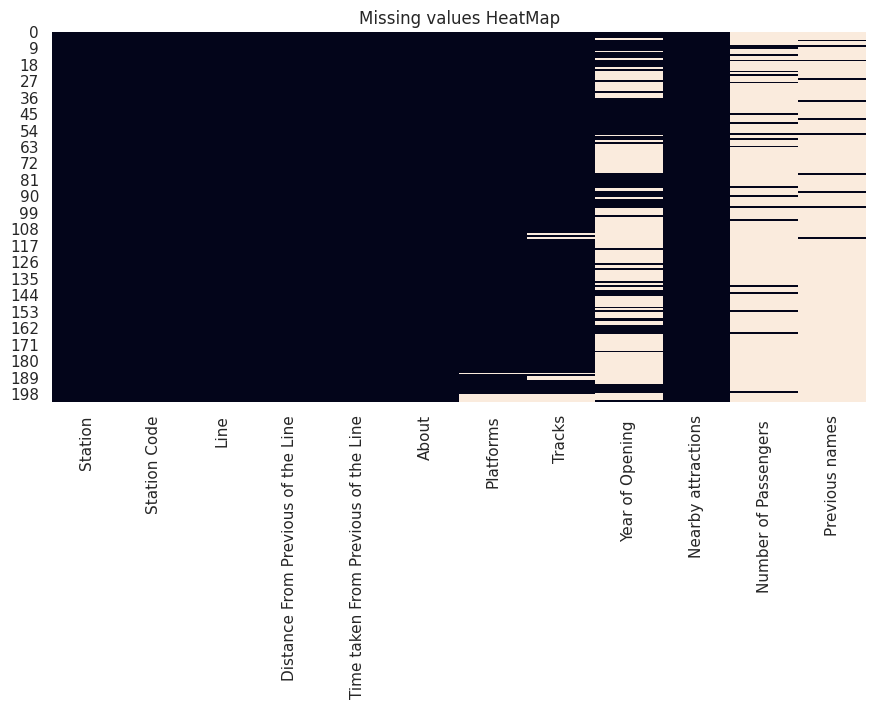

In [45]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing values HeatMap")
plt.show()

In [46]:
df.duplicated().sum()

np.int64(0)

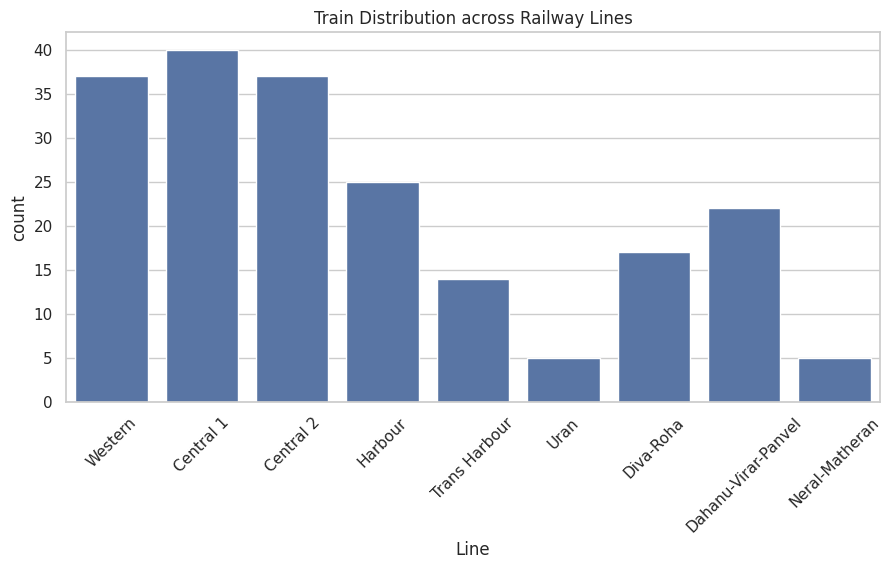

In [47]:
sns.countplot(x='Line', data=df)
plt.title("Train Distribution across Railway Lines")
plt.xticks(rotation=45)
plt.show()

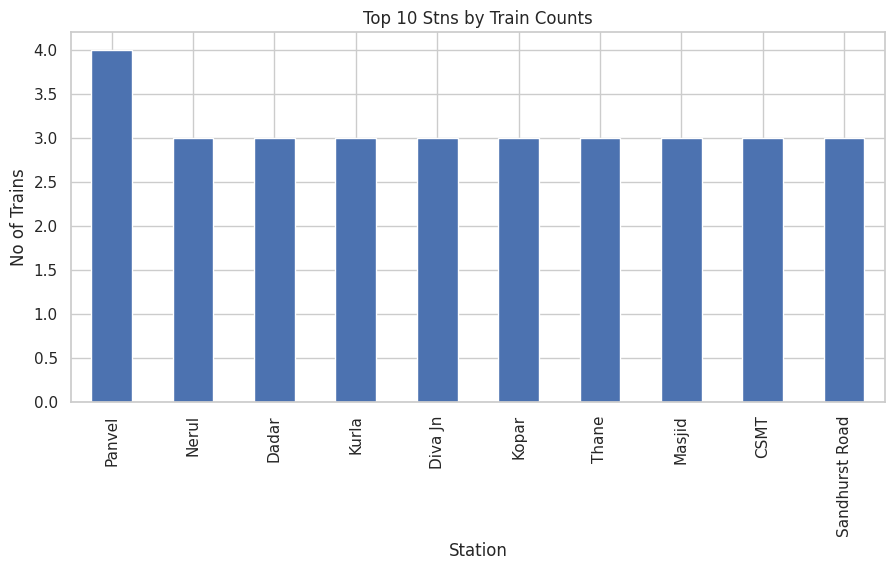

In [48]:
df['Station'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Stns by Train Counts")
plt.ylabel("No of Trains")
plt.show()

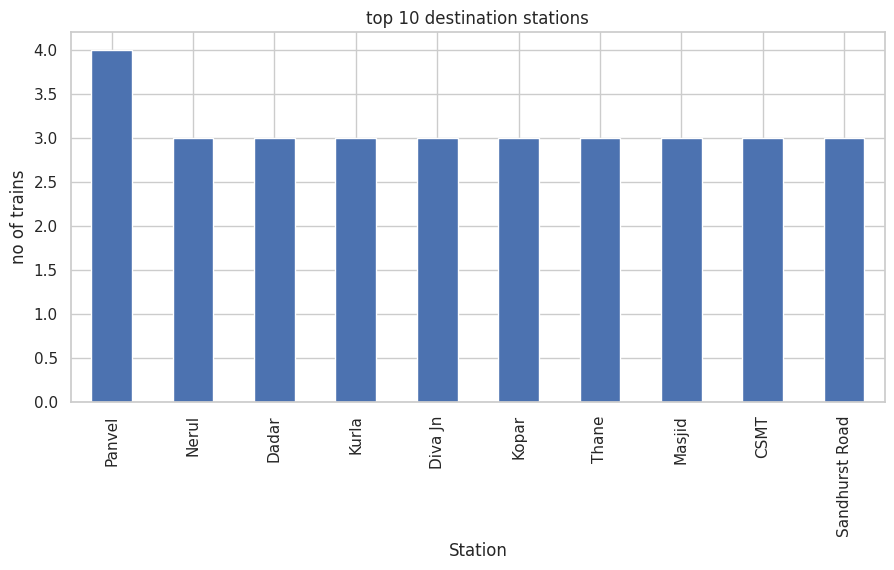

In [49]:
df['Station'].value_counts().head(10).plot(kind='bar')
plt.title("top 10 destination stations")
plt.ylabel("no of trains")
plt.show()

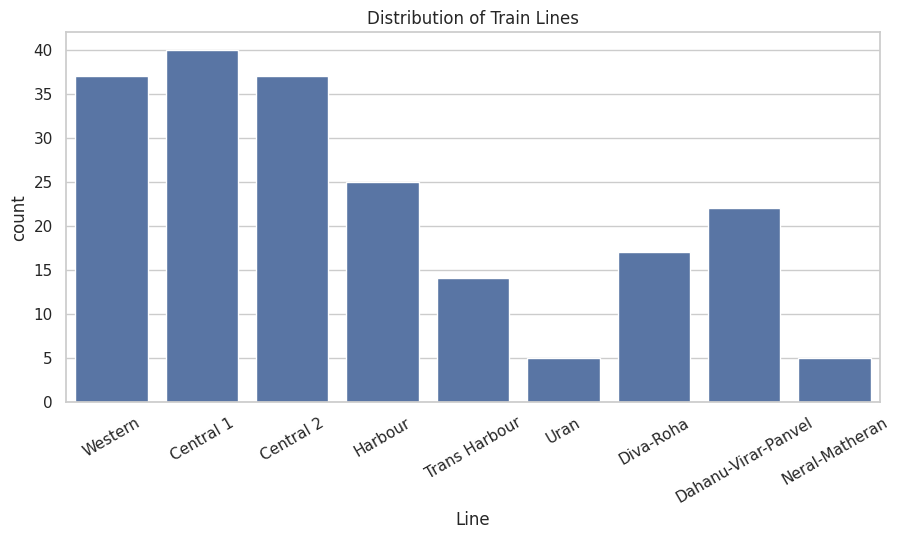

In [50]:
sns.countplot(x='Line', data=df)
plt.title("Distribution of Train Lines")
plt.xticks(rotation=30)
plt.show()

In [51]:
route_load=df.groupby('Line').size()
route_load.sort_values(ascending=False).head(10)

,0
Line,
Central 1,40
Central 2,37
Western,37
Harbour,25
Dahanu-Virar-Panvel,22
Diva-Roha,17
Trans Harbour,14
Neral-Matheran,5
Uran,5


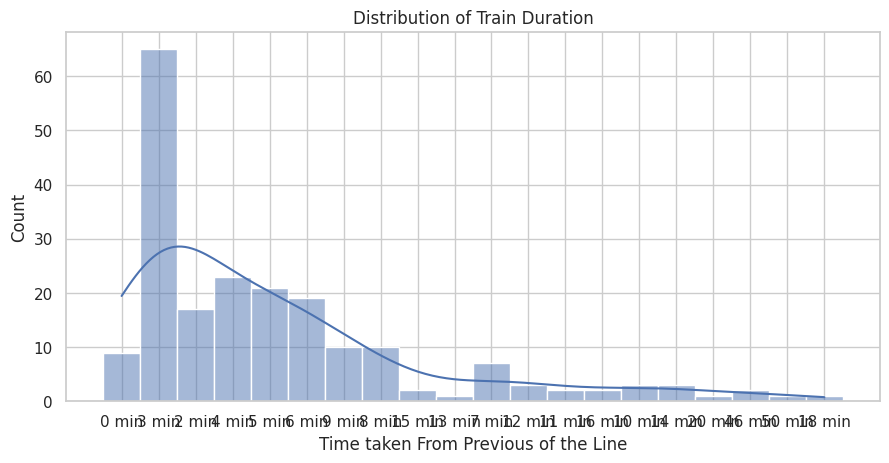

In [52]:
sns.histplot(df['Time taken From Previous of the Line'], kde=True)
plt.title("Distribution of Train Duration")
plt.show()

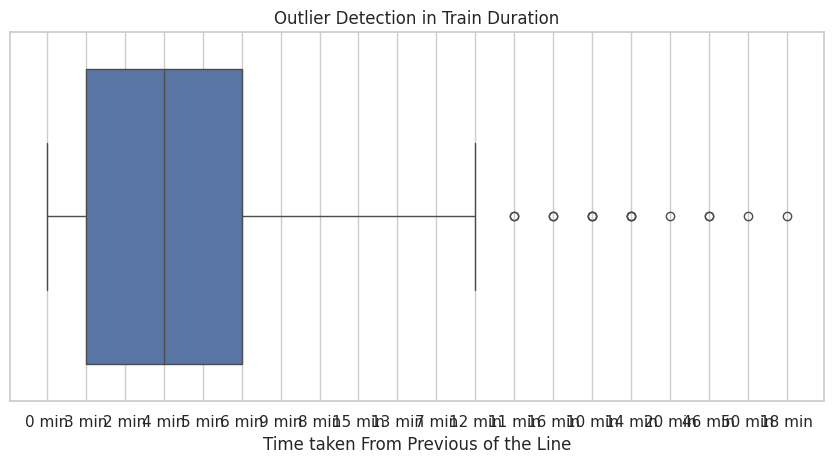

In [53]:

sns.boxplot(x=df['Time taken From Previous of the Line'])
plt.title("Outlier Detection in Train Duration")
plt.show()

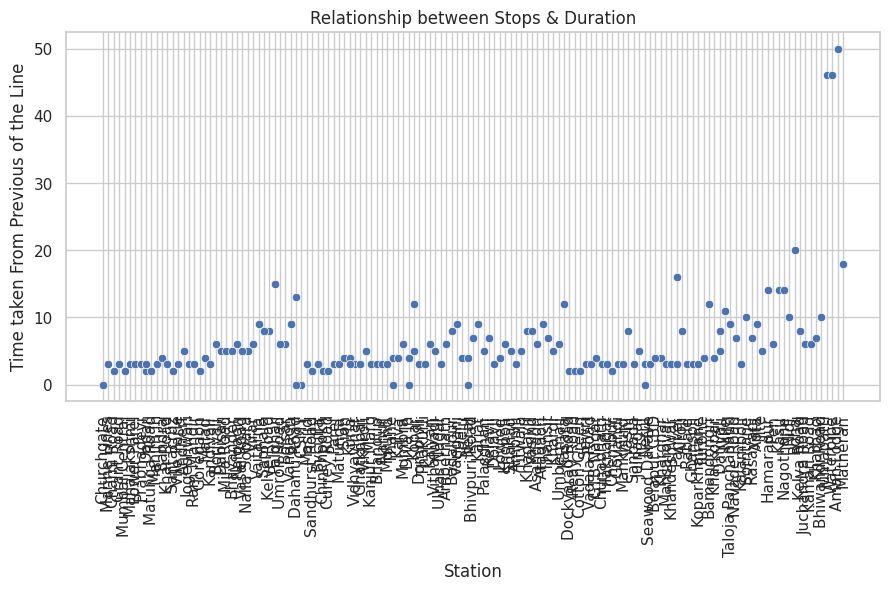

In [54]:
df['Time taken From Previous of the Line'] = df['Time taken From Previous of the Line'].str.replace(' min', '', regex=False).astype(float)
sns.scatterplot(x='Station', y='Time taken From Previous of the Line', data=df)
plt.title("Relationship between Stops & Duration")
plt.xticks(rotation=90)
plt.show()

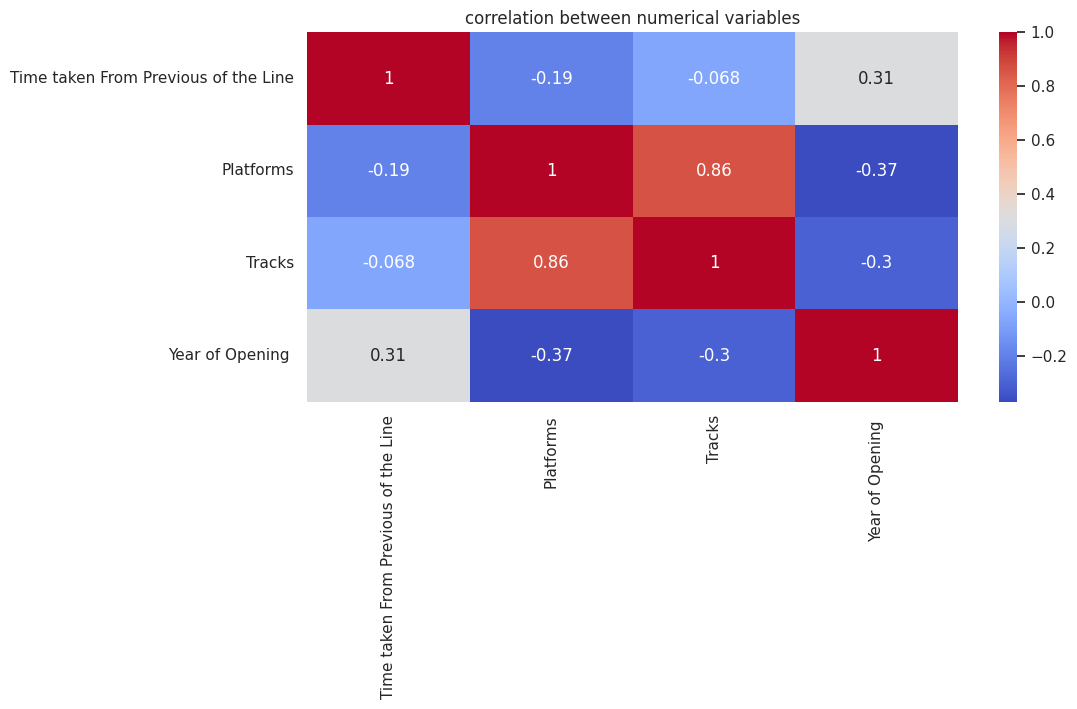

In [55]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title("correlation between numerical variables")
plt.show()
